**Name: Christ-Brian Amedjonekou**  
**Date: 04/16/2019**  
**PHYS 3600ID-D862 (Machine Learning) Study Hours Linear Regression**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**

### Abstract

Here, we have the Study Hours Dataset which we'll use to illustrate the Linear Regression | Gradient Descent Models. The Study Hours Dataset contains one feature vector (amount of hours studied) and one target vector (scores on the exam), both of which are quantitive, so Regression seems appropriate here. Since the dataset is simple, cleaning and preprosessing are not necessary. We'll use both Tensorflow and Scikit-Learn to implement Linear Regression (w/ Gradient Descent we'll just use tensorflow). We'll also evaluate the model's performance, find/tune the hyperparameters, and then provide visualizations of our results.

#### Contents

1. [Packages](#Packages)
2. [Data Exploration](#Data-Exploration)
3. [Data Visualization](#Data-Visualization)
4. [Linear Regression Theory](#Linear-Regression-Theory)
    1. [Normal Equations](#Normal-Equation:)
    2. [Cost Function](#Cost-Function:)
5. [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn)
    1. [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:)
    2. [Cross Validation](#Cross-Validation:)
    3. [Measuring Performance](#Measuring-Performance:)
    4. [Visualizations](#Visualizations:)
6. [Linear Regression via Tensorflow](#Linear-Regression-via-Tensorflow)
    1. [Train/Test Validation Strategy](#Train/Test-Validation-Strategy:)
    2. [$k$-fold Cross Validation](#K-fold-Cross-Validation:)
    3. [Measuring Performance](#Performance-Measure:)

### Packages   

In [1]:
# Package Imports being use to make things happen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import seaborn as sns
import tensorflow as tf

# Special methods/'magic' functions for the visualizations
sns.set()
%matplotlib inline

### Data Exploration

[Back to Contents](#Contents)

* The first thing we'll do is import and label our dataset.

In [2]:
DSH_df = pd.read_csv('Datasets/data_students_hours.csv', 
                     names= ['Feature: Study Time', 'Target: Test Scores'])

* Then we use the `.info()` method to get an idea of how many rows and columns (i.e.: instances, features) we have.

In [3]:
DSH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Feature: Study Time    100 non-null float64
Target: Test Scores    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


* The `.info()` method shows that we have a 100 rows, and 2 columns: one feature, one target. Additionally, all the values are non-null values. Therefore, filling in values and/or deleting columns (or rows) are unnecessary. Also all the values in the dataframe (minus the labels) are of type `float64` showing that we are dealing with continuous values.    


* **Note**: This dataset is really small but we'll continue to use it for a demonstration of both models. We'll also address any potential problems we run into along the way.


* Next, we'll use  the `.describe()` method to get some statistics about the dataset.

In [4]:
DSH_df.describe()

,Feature: Study Time,Target: Test Scores
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


* The `.describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution. 


* Usually when we describe central tendency, we refer to the mean, median, or mode. Central Tendency generally describes a number which summarizes a set of numbers. It's what we expect to see; It's what most likely to occur. For this dataset, the following is used to represent central tendency: 
$$\space$$
$$\text{Mean: Study Times} = 48.95834, \text{ Test Scores} = 72.735051$$  
$$\text{Quartiles }(50\%): \text{Study Times} = 49.634970, \text{ Test Scores} = 72.179542$$
$\space$
    * The 50% Quartile, represents the median of the data set.
    
    
* Standard deviation, and 25% | 50% | 75% Quartiles can be used to  describe the dispersion of the dataset; Dispersion is the extent to which a distribution is stretched or squeezed. Using the first (25%) and third (75%) quartile we can find the interquartile range (IQR). 
$$\space$$
$$\text{Quartiles }(25\%): \text{Study Times} = 41.526164, \text{ Test Scores} = 60.788586$$  
$$\text{Quartiles }(75\%): \text{Study Times} = 56.762631, \text{ Test Scores} = 83.215080$$


* The minimum and maximum values can also be used to describe dispersion (i.e.: The difference between the two describes the range)
    $$\space$$
    * **Minimum:** ($\text{Study Times} = 25.128485, \text{ Test Scores} = 31.707006$)
    * **Maximum:** ($\text{Study Times} = 70.346076, \text{ Test Scores} = 118.591217$)


* Now we have a good idea of the expected study duration and average test score. Below, we'll display the first 5 rows of the dataframe using the `.head()` method. This is just to get a better view of the structure of the dataframe.  

In [5]:
DSH_df.head()

,Feature: Study Time,Target: Test Scores
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


* In the next section, we'll plot that data so we can visualize the data even better.

### Data Visualization

[Back to Contents](#Contents)

* Since the dataset is pretty simple we'll use a scatter plot, the `.scatter()` method, to visualize the distribution of the points.

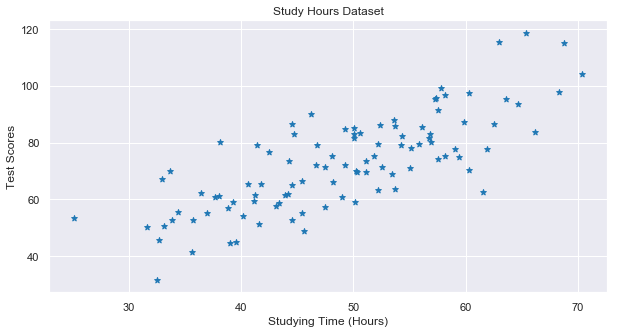

In [6]:
# Defines the Features and Target
features_DSH, Target_DSH = DSH_df['Feature: Study Time'], DSH_df['Target: Test Scores']

# Plots the Features vs Target
fig, ax = plt.subplots(figsize= (10,5))
ax.scatter(features_DSH, Target_DSH,marker='*',color = '#1f77b4')
ax.set(xlabel= 'Studying Time (Hours)', ylabel= 'Test Scores', 
       title= 'Study Hours Dataset');

* Just by looking at the Scatter Plot you can see an upward trend/positve correlation between the amount of hours spent studying and the Test Scores; The more you study, the better your test scores. 


* We could also plot a histogram of the data. We'll use the `sns.distplot()` method. By using the `sns.distplot()` method, we're able to plot a frequency distribution overlaid by a Kernel Density Estimate (specifically using a Gaussian Kernel). With the Kernel Density Estimate, we approximate a Normal (Gaussian) PDF. To verify we also create a `gaussianPlotter()` function that plots the Normal (Gaussian) PDF based upon the formula, $\cfrac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$.   

**Histogram w/ KDE Approx. & PDF of the Feature Vector**

/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


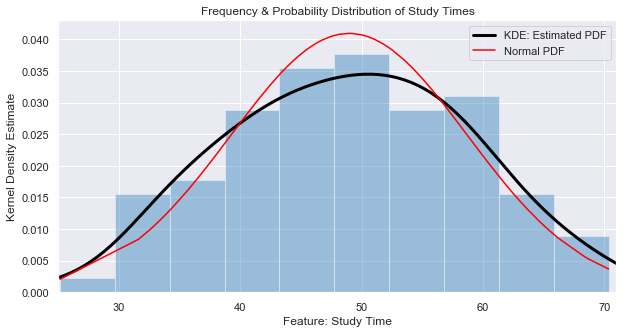

In [7]:
# Creating Gaussian Plot Function
def gaussianPlotter(vector):
    """
    Calculates and plots a Gaussian Probability Density Function (PDF)
    
    Parameters
    ----------
    vector : array-like, shape (n_samples, n_features)
            
    Returns
    -------
    output : matplotlib plt.plot()
    """
    mean = vector.mean()
    std_dev = vector.std()
    normal_pdf = (1/np.sqrt(2*np.pi*std_dev**2))*np.exp(-((vector.sort_values() - mean)**2)/(2*std_dev**2))
    plt.plot(vector.sort_values(), normal_pdf, color= 'red', label= 'Normal PDF')

# Creates the figure, title, and labels 
# Plots a Frequency distribution along w/ a Kernel Density Estimate
plt.figure(figsize= (10,5))

## Gaussian Kernel is used to estimate a Gaussian PDF
sns.distplot(features_DSH, bins= 10, kde= True, color= '#1f77b4', 
             kde_kws= {'kernel': 'gau', 'label': 'KDE: Estimated PDF', 
                       'color': 'black', 'lw': 3})

## Gaussian PDF plotting function
gaussianPlotter(features_DSH)

## Plot Labels
plt.title('Frequency & Probability Distribution of Study Times');
plt.ylabel('Kernel Density Estimate');
plt.xlim(25, 71)
plt.legend(loc= 'best')

**Histogram w/ KDE Approx. & PDF of the Target Vector**

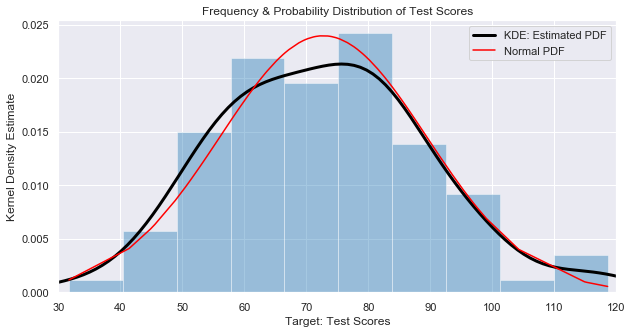

In [8]:
# Creates the figure, title, and labels 
# Plots a Frequency distribution along w/ a Kernel Density Estimate
plt.figure(figsize= (10,5))

## Gaussian Kernel is used to estimate a Gaussian PDF
sns.distplot(Target_DSH, bins= 10, kde= True, color= '#1f77b4', 
             kde_kws= {'kernel': 'gau', 'label': 'KDE: Estimated PDF', 
                       'color': 'black', 'lw': 3})

## Gaussian PDF plotting function
gaussianPlotter(Target_DSH)

## Plot Labels
plt.title('Frequency & Probability Distribution of Test Scores');
plt.ylabel('Kernel Density Estimate');
plt.xlim(30, 120)
plt.legend(loc= 'best')

* The histograms show that the distribution of Study Times and Test Scores are close to 'normal', and just barely skewed. We can assume the following properties: approximately 68% of the scores fall within 1 deviation of the mean, about 95% within 2 deviations, and 99.7% within 3 deviations. 


* We could also reinforce this histogram with a box plot which is another way to visualize the distribution. Quartiles, dispersion, and skewness are front and center with box plots. We use the `sns.boxplot()` function to demonstrate.

**Box Plot of the Features Vector**

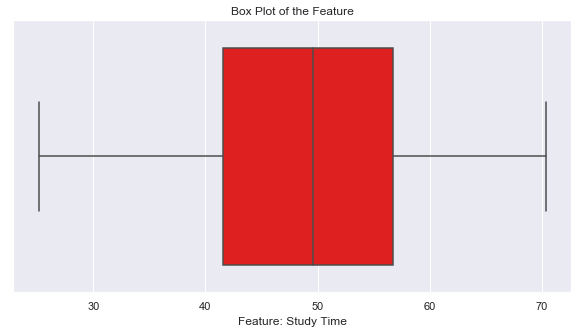

In [9]:
# Creates the figure, title, and labels 
# Plots a Box Plot
plt.figure(figsize= (10,5))

# Plotting the boxplot of the features
sns.boxplot(features_DSH, color= 'red')

# Plot Labels
plt.title('Box Plot of the Feature');

**Box Plot of the Target Vector**

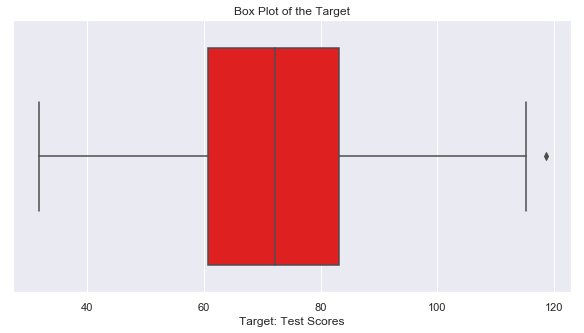

In [10]:
# Creates the figure, title, and labels 
# Plots a Box Plot
plt.figure(figsize= (10,5))

# Plotting the boxplot of the features
sns.boxplot(Target_DSH, color= 'red')

# Plot Labels
plt.title('Box Plot of the Target');

* Based on the box plot it seems the distribution of points barely shows any skewness and is more normal in appearence.  


* The dataset is really small, however, so visualizations will be limited. In the next section, we'll describe Linear Regression theoretically, then implement Scikit-Learn and Tensorflow methods.

### Linear Regression Theory

[Back to Contents](#Contents) | [Normal Equations](#Normal-Equation:) | [Cost Function](#Cost-Function:)

* Linear Regression is a method that is used to model relationships between a target and its features. You can think of the features as independent variables, and the target values as dependent variables. Linear Regression is commonly used for forecasting and predicting quantitive reponses; It is very successful in that domain. Linear Regression, at its simplest, takes on the following form:
$$\space$$
$$\mathbf{\hat{y} = \vec{x_{1}}\cdot\hat{\beta_1} + \hat{\beta_0}}$$
$$\space$$  
    * '$\hat{\beta_m}$' (in this case $m = 0, 1$) represents the weights, or parameters you have to find in order satisfy the linear combination. For linear regression by the Least Squares Method, this is an approximation  
    $$\space$$
    * '$\hat{\beta_0}$' also represents the intercept/bias
    $$\space$$
    * '$\vec{x_{1}}$' represents the independent variable which is a feature (column vector) of the dataset. $x_{0}$ is a variable for the bias term but $x_{0} = 1$ which is why it seems absent above
    $$\space$$
    * '$\hat{y}$' is the dependent variable, or predicted value of the dataset. It's also a column vector

* If a target depends on multiple features, Multiple-Linear (more than 1 feature variable) Regression can be used. It can be expressed using the following linear combination:  
$$\space$$
$$\mathbf{\hat{y} = \vec{x_{1}}\cdot\hat{\beta_1} + \vec{x_{2}}\cdot\hat{\beta_2} + \vec{x_{3}}\cdot\hat{\beta_3} + ... + \vec{x_{m}}\cdot\hat{\beta_m} + \hat{\beta_0}}$$
$$\space$$ 
    * '$m$' represents the number of features
    * '$\hat{\beta_m}$' (in this case $m = 0,1,2,3,...$) represents the weights, or parameters 
    * '$\hat{\beta_0}$' also represents the intercept/bias
    * '$x_{m}$' (where $m = 1,2,3,...$) represents the independent variable which is a feature (column vector) of the dataset. '$x_{m}$' has '$n$' instances, where $n = 1,2,3,...$  
    * $x_{0}$ is still present. It equals 1 for all instances, '$n$'
    * '$\hat{y}$' is the dependent variable, or the predicted value

* However, whether it's simple or multiple-linear regression, it can be more convenient to  express the above linear combinations (which are in vector form) in their matrix form: 
$$\space$$
$$\hat{y} = X \cdot \mathbf{\hat{\beta}}$$
$$\space$$
    * where '$\hat{\beta}$' represents the weights, or parameters you have to find. $\hat{\beta}$ is column vector of parameters $\hat{\beta_m}$. 
    $$\space$$
    $$\hat{\beta} =
    \left[{\begin{array}{c}
    \hat{\beta_0} \\
    \hat{\beta_1} \\
    \vdots \\
    \hat{\beta_m} \\
    \end{array} } \right]$$
    $$\space$$
    * '$X$' represents the the independent variables, the feature values as a matrix
    $$\space$$
    $$X =
    \left[{\begin{matrix}
    1 & x_{1,1} & x_{2,1} & \cdots & x_{m,1} \\
    1 & x_{1,2} & x_{2,2} & \cdots & x_{m,2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{1,n} & x_{2,n} & \cdots & x_{m,n} \\
    \end{matrix} } \right]$$
    $$\space$$
    * '$\hat{y}$' is the dependent variable which is the predicted value, or target vector
    $$\space$$
    $$\hat{y} =
    \left[{\begin{array}{c}
    \hat{y_1} \\
    \hat{y_2} \\
    \vdots \\
    \hat{y_n} \\
    \end{array} } \right]$$
    $$\space$$

* Matrix Form is more convenient because fitting the model using Linear Regression is commonly done with the Least Squares Method (and Normal Equations). This is regardless of the method of implemention, whether it's our own method, Scikit-Learn, or Tensorflow.
    
##### Normal Equation:

[Back to Contents](#Contents) | [Linear Regression Theory](#Linear-Regression-Theory) | [Cost Function](#Cost-Function:) 


* A Normal Equation, like the one shown below, is an equation that describes the orthogonal relationship between the residual vector $\big(\epsilon = y - X \cdot \hat{\beta}\big)$ and the plane $\big\{X \cdot \vec{\beta} \space | \space \beta \in R^n \big\}$ where '$\vec{\beta}$' is the ***exact*** parameter vector needed to solve $y = X \cdot \vec{\beta}$. $\space \vec{\beta} =
\left[{\begin{array}{c}
\beta_0 \\
\vdots \\
\beta_m \\
\end{array} } \right]$. 


* However, since we have a dataset with more instances '$n$' than features '$m$' to describe them, the result is an inconsistent system. Inconsistent systems indicate that the best we can do are approximations, meaning '$\hat{y}$' and '$\mathbf{\hat{\beta}}$': 

> **Normal equations for least squares**
> $$X^T \hat{y} = X^T X \cdot \mathbf{\hat{\beta}}$$

  
* We want the best approximations, of course, and the way to do that is by minimizing a cost function.     

##### Cost Function:

[Back to Contents](#Contents) | [Linear Regression Theory](#Linear-Regression-Theory) | [Normal Equations](#Normal-Equation:) 

* The cost function that we want minimize expresses the size of the residual vector. In other words, minimizing the cost function minimizes the size of the residual vector.


* There are many cost functions that we could use to describe the size of the residual vector, $\epsilon$. However minimizing one, minimizes the others as they are closely related. Some cost functions include:

> ***Types of Cost Functions:***  
> * **2-Norm:** $||\epsilon||_{2} = \sqrt{\sum_{j = 1}^{m}\epsilon_m^2}$  
> * **Squared Error (SE):** $\big(||\epsilon||_{2} \big)^2 = \sum_{j = 1}^{m}\epsilon_m^2$  
> $\space$  
> * **Mean Squared Error (MSE):** $\frac{\big(||\epsilon||_{2} \big)^2}{m} = \frac{1}{m}\sum_{j = 1}^{m}\epsilon_m^2$ 
> $$\space$$  
> * **Root Mean Squared Error (RMSE):** $\frac{||\epsilon||_{2}}{\sqrt{m}} = \sqrt{\frac{1}{m}\sum_{j = 1}^{m}\epsilon_m^2}$    


* To minimize the cost function, we have to find the solution to the Normal Equation. In other words, we have to find the value of the approximated vector $\mathbf{\hat{\beta}}$. We rewrite the the Normal Equation in terms of $\mathbf{\hat{\beta}}$ to get the following:

> ***Solution to the Normal Equation:***
> $$\mathbf{\hat{\beta}} = \big(X^T X\big)^{-1} X^T \hat{y}$$


* In the following sections, we'll provide a demonstration via 2 implementations: Scikit-Learn, and TensorFlow.

### Linear Regression via Scikit-Learn 

| [Back to Contents](#Contents) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) | [Measuring Performance](#Measuring-Performance:) | [Visualizations](#Visualizations:)

* First, we'll implement the Linear Regression Model using the simple Train/Test Validation Stategy 
* Then, we'll follow up with an implementation using K-Fold Cross Validation 
* We'll examine the model performance by looking at the RMSE
* Finally, we'll plot a visualization of the model against the data points

##### Implementation via Train/Test Validation Strategy:

| [Back to Contents](#Contents) | [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) | [Measuring Performance](#Measuring-Performance:) | [Visualizations](#Visualizations:)


* For this implementation, we do several things: create the model, fit the data using the training set, and create predictions.  

* Creating a function to find the Residuals is also done for this implementation.

In [11]:
# Creating a function to find the Residuals 
def finding_residuals(X, y, beta0, beta1):
    """
    Finds the residual 
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
 
    y : array_like, shape (n_targets)

    beta0 : A float, the approximated intercept. 
            An element of the least square solution, Column Vector beta
            
    beta1 : A float, the approximated intercept. 
            An element of the least square solution, Column Vector beta 
            
    Returns
    -------
    output : Array-like, the residuals
    """
    beta = np.array([beta0, beta1])
    X = np.hstack((np.ones(X.shape), X))
    return y.reshape(10,1) - np.dot(X, beta.reshape(-1,1))

* We also compare the predicted scores with actual test scores by finding the residuals. If our model is good, then the length of the residual should not be significantly large.

In [12]:
# Assigning Linear Regression to variable
model_sklearn = LinearRegression()


# Create a test set and training set
X_train, X_test, y_train, y_test = train_test_split(features_DSH.to_numpy().reshape(-1,1), 
                                                    Target_DSH.to_numpy(), test_size= 0.10, 
                                                    random_state= 30)

# Fitting the model to the training set
model_sklearn.fit(X_train, y_train)

# Predictions 
y_pred = model_sklearn.predict(X_test)
printString = 'Residual as the Difference between Test Scores & Predicted Scores: \n{} \n'
printString_ = 'Residual using (r = y - X*beta ): \n{} \n'
printStr = 'Parameters (Slope/Intercept): \n{} \n'
parameters = np.array([model_sklearn.coef_[0], model_sklearn.intercept_]).reshape(2,1)
print('\nPredicted Test Scores: \n{} \n'.format(y_pred))
print(printStr.format(parameters))
print(printString.format((y_test - y_pred).reshape(10,1)))
print(printString_.format(finding_residuals(X_test, y_test, 
                                            model_sklearn.intercept_, 
                                            model_sklearn.coef_[0])))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


Predicted Test Scores: 
[ 94.99769926  78.62497891  83.61979053  61.47421276  71.30648722
 100.44243462  93.98406058  66.20623052  82.82955018  58.07598427] 

Parameters (Slope/Intercept): 
[[1.31000868]
 [8.28846523]] 

Residual as the Difference between Test Scores & Predicted Scores: 
[[-11.1191346 ]
 [  7.04322424]
 [ -9.53566041]
 [  4.0880885 ]
 [  4.02475508]
 [  3.81466696]
 [ 24.60715672]
 [  7.4813338 ]
 [ -2.62202704]
 [  3.29092027]] 

Residual using (r = y - X*beta ): 
[[-11.1191346 ]
 [  7.04322424]
 [ -9.53566041]
 [  4.0880885 ]
 [  4.02475508]
 [  3.81466696]
 [ 24.60715672]
 [  7.4813338 ]
 [ -2.62202704]
 [  3.29092027]] 

RMSE: 9.95400163640461


/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


* We found the residuals with two, but equivalent, ways: 
    
    1. Finding the difference between the true test scores and predicted scores which I find to be more intuitive. It answers the question on how close are our predictions to our real scores.
    2. Using $\epsilon = y - X \cdot \hat{\beta}$ to find the length of the residuals.
    

* This shows pretty reasonable results as there are no significantly large differences between predicted and real scores. 


* For a better description of performance, we'll look at the Root Mean Square Error (RMSE). It's printed here but we'll reserve the conversation for *Measuring Performance* section. For now, we'll discuss another and more effective validation strategy known as *k-fold Cross Validation* and the python method `cross_val_predict()`.  

##### $k$-fold Cross Validation: 

| [Back to Contents](#Contents) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn) | [Measuring Performance](#Measuring-Performance:) | [Visualizations](#Visualizations:)

* $k$-fold Cross Validation is another validation strategy we'll use to test the reliability of our model.
> In $k$-fold cross validation ($k = \text{the number of splits}$), we're allowed to select the number of splits we would like to use to train/test the model. Each split participates in the training and testing phase of the model. In other words, each split will have a turn as the test set or *holdout set*; All the data gets used.

* The reason we consider this strategy/method is because we lack data. While this is partly 
* We'll test whether our model performs roughly the same across all train/test splits. 
 
* The value of $k$ in our k-fold cross validation is set to 10. The code segment below shows how the data set is split into 10 train/test splits. 

>```python
for train, test in KFold(10).split(features_DSH.to_numpy().reshape(-1,1)):
    print('Train: \n\n', train, '\n\nTest: \n\n', test, '\n\n')```

* Below we run the k-fold cross validation and find the predictions (and residuals).

In [13]:
# 10-fold cross validation predictions
predict_Linear = cross_val_predict(model_sklearn, features_DSH.to_numpy().reshape(-1,1), 
                                   Target_DSH.to_numpy().reshape(100,1), 
                                   cv= KFold(10, shuffle= False, random_state= 30))
residuals_ = Target_DSH.to_numpy().reshape(-1,1)[::10] - predict_Linear[::10]
print('\nFirst 10 predicted "y" values of the 100 instances, "x": \n \n{} \n'.format(predict_Linear[::10]))
print('Residuals for the First 10 predicted "y" values: \n \n{} \n'.format(residuals_))


First 10 predicted "y" values of the 100 instances, "x": 
 
[[51.43802312]
 [68.47821657]
 [94.76339392]
 [77.31544681]
 [67.24409421]
 [57.37566815]
 [62.47513362]
 [50.16397211]
 [83.2901182 ]
 [50.15048366]] 

Residuals for the First 10 predicted "y" values: 
 
[[-19.73101727]
 [-13.31253942]
 [-10.88482926]
 [-13.95665649]
 [-14.56111084]
 [ 22.79060729]
 [ -0.79109609]
 [  0.22869802]
 [ -3.08259506]
 [ 17.02017211]] 



* Once again we do not have a large disparity between predicted and actual values. However, we'll use `cross_val_score()` and the **RMSE** performance metric (`scoring = 'neg_mean_squared_error'`) to find out the performance of our model.

##### Measuring Performance: 

| [Back to Contents](#Contents) | [Scikit-Learn Implementation](#Scikit-Learn-Implementation:) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:) | [Visualizations](#Visualizations:)

* To measure performance, we chose the RMSE as a metric. Ideally, if our RMSE is low (the closer to zero, the better) we can say that model is representative of the data; The model fits the data pretty well.


* As aforementioned, RMSE is a measure of accuracy. Generally speaking, if the RMSE is low then we consider the model to be pretty accurate.

> ***"The RMSE serves to aggregate the magnitudes of the errors in predictions for various times into a single measure of predictive power."*** - [source](https://en.wikipedia.org/wiki/Root-mean-square_deviation)   

In [14]:
# 10-fold cross validation scoring
# Use 'sorted(metrics.SCORERS.keys())' for the valid scoring options
scores_scikit = cross_val_score(model_sklearn, features_DSH.to_numpy().reshape(-1,1), 
                                Target_DSH.to_numpy().reshape(100,1), 
                                cv= KFold(10, shuffle= False, random_state= 42), 
                                scoring= 'neg_mean_squared_error')
print('\nRMSE for Model (10-fold Cross Validation): \n \n{} \n'.format(np.sqrt(-scores_scikit)))
print('Average of the RMSE : {} \n'.format(np.sqrt(-scores_scikit).mean()))


RMSE for Model (10-fold Cross Validation): 
 
[11.56076561 10.89848821 12.26753369  9.88276715 10.93823129 10.56155162
 11.5727542   9.90417213  6.52713838 12.3179357 ] 

Average of the RMSE : 10.643133798341022 



* Our error for the dataset is pretty low. We can interpret this is a successful model fitted to the data.

* For the last section of our Scikit-Learn Implementation, we will provide visualizations of the model.

##### Visualizations:

| [Back to Contents](#Contents) | [Linear-Regression-via-Scikit-Learn](#Linear-Regression-via-Scikit-Learn) | [Train/Test Validation Strategy](#Implementation-via-Train/Test-Validation-Strategy:) | [Measuring Performance](#Measuring-Performance:) | [$k$-fold Cross Validation](#$k$-fold-Cross-Validation:)

* Here we provide a trendline that attempts to summarize the relationship between study time and test scores. The trendline confirms an earlier assumption we had (positive correlation between the amount of hours studied and test scores).


* The first visualization will be directly from the implemention of our model. 


* The second is the same as the first; We calculate by hand using the sum of squares formulas to acquire the slope and intercept.


**Visualization 1: Scikit-Learn Model Implementation**

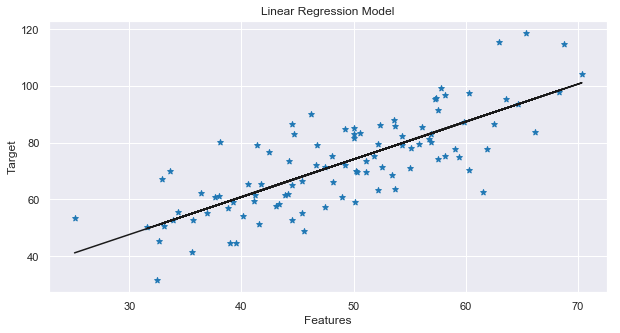

In [15]:
# plotting the points in a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(features_DSH, Target_DSH,marker='*',color = '#1f77b4');

# fitting the model 
model_sklearn.fit(features_DSH.to_numpy().reshape(-1,1), Target_DSH)
plt.plot(features_DSH, model_sklearn.coef_* features_DSH + model_sklearn.intercept_, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Target');

**Visualization 2: Hand Calculations using Sum of Squares Formulas**

* The functions used to craft the graph where based off the following equations:

$$S S_{xy} = \sum x_i y_i - \frac{(\sum x_i \sum y_i)}{n}$$

$$S S_{xx} = \sum x_i^2 - \frac{(\sum x_i)^2}{n}$$

$$m = \frac{S S_{xy}}{S S_{xx}}$$

$$b = \bar{y} - m * \bar{x}$$

$$\text{where } n = \text{ number of points}$$



The slope is: 1.3224310227553753 and the intercept is: 7.991020982269632

RMSE 10.761679391448236


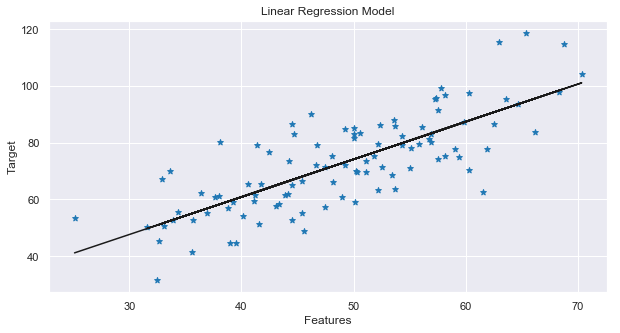

In [16]:
# Creating functions to calculate the sum of squares
def ssXY(x, y):
    """Calculates the Sum of Squares for 'x' and 'y'."""
    n = y.size
    return sum(x*y) - ((sum(x)*sum(y))/n)

    
def ssXX(x):
    """Calculates the Sum of Squares for 'x'."""
    n = x.size
    return sum(x*x) - ((sum(x)*sum(x))/n)

# Finding/Printing the value of the slope and intercept
slope = ssXY(features_DSH, Target_DSH)/ssXX(features_DSH)
intercept = Target_DSH.mean() - slope * features_DSH.mean()
print('The slope is: {1} and the intercept is: {0}'.format(intercept, slope))

# Plotting the points in a scatter plot
plt.figure(figsize= (10, 5))
plt.scatter(features_DSH, Target_DSH,marker='*',color = '#1f77b4');

# Printing the value of the RMSE
print('\nRMSE',np.sqrt(metrics.mean_squared_error(Target_DSH, predict_Linear)))

# Plotting the model 
plt.plot(features_DSH, slope* features_DSH + intercept, color = 'k')
plt.title('Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Target');

* We now have a pretty good visual representation of the trend of the data (and the relationship between study time and test scores).


* However, there is a caveat. We do seem to have a few outliers which skew our results (very small skewing as mentioned before) slightly.


* Next we'll take a look at the implementation via tensorflow.


### Linear Regression via Tensorflow

| [Back to Contents](#Contents) | [Tensorflow Linear Regression Class](#Tensorflow-Linear-Regression-Class:) | [Train/Test Validation Strategy](#Train/Test-Validation-Strategy:) | [$k$-fold Cross Validation](#K-fold-Cross-Validation:) | [Measuring Performance](#Performance-Measure:) | 

* First, we'll implement the Linear Regression Model via Tensorflow 
* We'll examine the model performance by looking at the RMSE
* Finally, we'll plot a visualization of the model against the data points

##### Tensorflow Linear Regression Class:

**Class using Normal Equations $\big[\space \mathbf{\hat{\beta}} = \big(X^T X\big)^{-1} X^T \hat{y} \space \big]$ as base** 

In [17]:
class TensorflowLinearRegression():
    
    def __init__(self, coef_= None, intercept_= None):
        # creating/initializing attributes
        self.coef_ = coef_
        self.intercept_ = intercept_

    def fit(self, data, target):
        """
        Finds the the approximated least square solution. 

        Parameters
        ----------
        data: array-like or sparse matrix, shape (n_samples, n_features)

        target: array_like, shape (n_samples)

        Returns
        -------
        beta : array-like, the approximated least square solution. 
        """
        
        # I normally use pandas dataframes to visualize data in tabular format
        # but the below tensorflow and numpy methods work best using number arrays
        # so the conditional statement below checks the type of the object in question
        # if the object I use is a pandas dataframe then it converts it to a numpy array
        # before reshaping, else it just reshapes the object in question 
        # (assume numpy, scipy array type). 
        if str(type(data)) == "<class 'pandas.core.series.Series'>":
            # Converts pandas dataframe to numpy array
            data = data.to_numpy().reshape(data.shape[0], 1)
            target = target.to_numpy().reshape(data.shape[0], 1)
        else:
            # redefines the shape
            data = data.reshape(data.shape[0], 1)
            target = target.reshape(data.shape[0], 1)

        # Adds Bias Term
        data = np.hstack((np.ones(data.shape[0]).reshape(data.shape[0], 1), data))

        # Creates the graph and variable initializer
        X = tf.placeholder(dtype= tf.float64, shape= None, name= 'X')
        y = tf.placeholder(dtype= tf.float64, shape= None, name= 'y')
        XT = tf.transpose(X)
        beta = tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), tf.matmul(XT, y))
        init = tf.global_variables_initializer()

        # Starts a session and runs the graph
        with tf.Session() as sess:
            init.run()
            result = beta.eval(feed_dict= {X: data, y: target})
        
        # Overwrites attributes w/ values of result 
        # (the vector beta which is the Least Squares Solution)
        self.intercept_, self.coef_ = result[0], result[1]
        
        return self
    
    def predict(self, data):
        """
        Predicts future test scores based on parameters found during training 

        Parameters
        ----------
        data: array-like or sparse matrix, shape (n_samples, n_features)

        Returns
        -------
        result : array-like, the predicted values found using hyperparameters. 
        """
        # Creating Tensorflow graph: defining input nodes (data), nodes for the weights
        # (coeff, bias), and an output node (ypred). 
        data = tf.constant(data, dtype= tf.float64)
        coeff = tf.constant(self.coef_, dtype= tf.float64, 
                            shape= [self.coef_.shape[0], 1])
        bias = tf.constant(self.intercept_, dtype= tf.float64, 
                           shape= [self.intercept_.shape[0], 1])
        
        # Predictions based on the best fit line (yhat = beta1*x1 + beta0)
        ypred = tf.add(tf.multiply(coeff, data), bias) 
        
        # Creating Tensorflow graph: initializer node also created
        init = tf.global_variables_initializer()
        
        # Running Tensorflow graph
        with tf.Session() as sess:
            init.run()
            result = ypred.eval()    
            
        return result
    
    def rmse(self, data, target):
        """
        Finds the Root Means Square Error. This is the cost or loss function by which
        we evaluate our model.

        Parameters
        ----------
        data : array-like or sparse matrix, shape (n_samples, n_features)

        target : array_like, shape (n_targets)

        Returns
        -------
        output : Array-like, the residuals
        """
        
        beta0 = self.intercept_
        beta1 = self.coef_
        
        # A function the calculates the residuals
        def residuals(data, target, beta0, beta1):
            """
            Finds the residual 

            Parameters
            ----------
            data : array-like or sparse matrix, shape (n_samples, n_features)

            target : array_like, shape (n_targets)

            beta0 : A float, the approximated intercept. 
                    An element of the least square solution, Column Vector beta

            beta1 : A float, the approximated intercept. 
                    An element of the least square solution, Column Vector beta 

            Returns
            -------
            result : Array-like, the residuals
            """
            
            # Computes the residual (epsilon = y - X*beta)
            beta = np.array([beta0, beta1]) # forms on 
            data = np.hstack((np.ones(data.shape), data)) # adds bias column
            
            # Stores the residual (epsilon = y - X*beta) in result and returns it
            result = target.reshape(target.shape[0], 1) - np.dot(data, beta.reshape(-1,1))
            
            return result 
        
        # Creating Tensorflow graph: all parameters are being converted into tensors.
        m = tf.constant(residuals(data, target, beta0, beta1).shape[0], 
                        dtype= tf.float64, shape= None, name= 'm')
        epsilon = tf.constant(residuals(data, target, beta0, beta1), 
                              dtype= tf.float64, shape= None, name= 'eps') 
        
        # Calculates the Root Mean Square Error (RMSE)
        rmse = tf.sqrt(tf.divide(tf.reduce_sum(tf.pow(epsilon, 2)), m))
        
        # Creating Tensorflow graph: initializer node also created
        init = tf.global_variables_initializer()
        
        # Running Tensorflow graph
        with tf.Session() as sess:
            init.run()
            result = rmse.eval()
            
        return result


##### Train/Test Validation Strategy:

| [Back to Contents](#Contents) | [Tensorflow Linear Regression Class](#Tensorflow-Linear-Regression-Class:) | [$k$-fold Cross Validation](#K-fold-Cross-Validation:) | [Measuring Performance](#Performance-Measure:) | 

**Part 1: Finding the Slope/Intercept**

In [18]:
linearRegModel = TensorflowLinearRegression()
linearRegModel.fit(X_train, y_train)
statement = 'Slope: {0} and Intercept: {1} of the approximated model'
print(statement.format(linearRegModel.coef_[0], linearRegModel.intercept_[0]))

Slope: 1.310008676209769 and Intercept: 8.28846523098241 of the approximated model


##### Performance Measure:

| [Back to Contents](#Contents) | [Tensorflow Linear Regression Class](#Tensorflow-Linear-Regression-Class:) | [$k$-fold Cross Validation](#K-fold-Cross-Validation:) | [Test/Train Validation Strategy](#Train/Test-Validation-Strategy:) | 

**Part 1: Finding the residuals**

In [19]:
pred = linearRegModel.predict(X_test)
statement_ = 'Residuals: \n\n{0} \n \nof the predicted values'
print(statement_.format(y_test.reshape(y_test.shape[0], 1) - pred))

Residuals: 

[[-11.1191346 ]
 [  7.04322424]
 [ -9.53566041]
 [  4.0880885 ]
 [  4.02475508]
 [  3.81466696]
 [ 24.60715672]
 [  7.4813338 ]
 [ -2.62202704]
 [  3.29092027]] 
 
of the predicted values


**Part 2: Finding the Root Mean Square Error**

In [20]:
statemnt = 'The Root Mean Square Error for the model: {}'
container = linearRegModel.rmse(X_test, y_test)
print(statemnt.format(container))

The Root Mean Square Error for the model: 9.954001636404632


##### K-fold Cross Validation:

| [Back to Contents](#Contents) | [Tensorflow Linear Regression Class](#Tensorflow-Linear-Regression-Class:) | [Measuring Performance](#Performance-Measure:) | [Test/Train Validation Strategy](#Train/Test-Validation-Strategy:) | 

**Part 1: Reporting score by creating a function called `scorer()` which calculates the Root Mean Square Error.**

In [21]:
def scorer(estimator, features, target, n_splits, On= True):
    """
    Does k-fold cross validation and reports scores over all splits 

    Parameters
    ----------
    estimator : object, the ML model we want to use
    
    features : array-like or sparse matrix, shape (n_samples, n_features)

    target : array_like, shape (n_targets)

    n_splits : int, the number of splits 
    
    On : bool, True or False. By default, set to True. Determines whether we 
         shuffle our data before performing splits and scoring. 

    Returns
    -------
    result : Array-like, the scores
    """
    
    # This functions does two things: checks the type of features/target, and generates
    # 'k' test/train splits using a generator function. 
    def kfold_split(features, target, n_splits, On):
        
        #generator function used to generate 'k' test/train splits. 
        def dataset_generator():
            for train_index, test_index in KFold(n_splits, shuffle= On).split(features):
                features_train, features_test = features[train_index], features[test_index]
                target_train, target_test = target[train_index], target[test_index]
                yield np.array([features_train, features_test, target_train, target_test])
        
        # I normally use pandas dataframes to visualize data in tabular format
        # but the below tensorflow and numpy methods work best using number arrays
        # so the conditional statement below checks the type of the object in question
        # if the object I use is a pandas dataframe then it converts it to a numpy array
        # before reshaping, else it just reshapes the object in question 
        # (assume numpy, scipy array type).
        if str(type(features)) == "<class 'pandas.core.series.Series'>":
            # Converts pandas dataframe to numpy array
            features = features.to_numpy().reshape(features.shape[0], 1)
            target = target.to_numpy().reshape(features.shape[0], 1)
        else:
            # redefines the shape
            features = features.reshape(features.shape[0], 1)
            target = target.reshape(features.shape[0], 1)

        return dataset_generator()

    # assigns generator to variable
    dataSplitter = kfold_split(features_DSH, Target_DSH, n_splits, On)
    
    # empty container to store results
    container = []
    
    # loop used to create the test/train splits, fit each split, find RMSE, then appends
    # result to empty container
    for i in range(n_splits):
        features_train, features_test, target_train, target_test = next(dataSplitter)
        estimator.fit(features_train, target_train)
        container.append(estimator.rmse(features_test, target_test))
        
    return np.array(container)

In [22]:
# 10-fold cross validation scoring
numSplits = 10
estimator_ = TensorflowLinearRegression()
scores_TF = scorer(estimator_, features_DSH, Target_DSH, numSplits)
print('\nRMSE for Model (10-fold Cross Validation): \n \n{} \n'.format(scores_TF))
print('Average of the RMSE : {} \n'.format(scores_TF.mean()))


RMSE for Model (10-fold Cross Validation): 
 
[11.83247257  7.34833086 10.7375845   8.52638042 12.45865879 11.77211372
 10.83933933 10.67438215 12.22930235  8.6850065 ] 

Average of the RMSE : 10.51035711946597 



**Part 2: Reporting first 10 predictions by creating a function called `predictor()` which does k-fold cross validation, then gives 10 predictions.**

In [23]:
def predictor(estimator, features, target, n_splits, On= True):
    """
    Does k-fold cross validation and reports the predictions from the model used 

    Parameters
    ----------
    estimator : object, the ML model we want to use
    
    features : array-like or sparse matrix, shape (n_samples, n_features)

    target : array_like, shape (n_targets)

    n_splits : int, the number of splits 
    
    On : bool, True or False. By default, set to True. Determines whether we 
         shuffle our data before performing splits and scoring. 

    Returns
    -------
    result : Array-like, the predictions
    """
    
    # This functions does two things: checks the type of features/target, and generates
    # 'k' test/train splits using a generator function.
    def kfold_split(features, target, n_splits, On):
        
        # generator function used to generate 'k' test/train splits.
        def dataset_generator():
            for train_index, test_index in KFold(n_splits, shuffle= On).split(features):
                features_train, features_test = features[train_index], features[test_index]
                target_train, target_test = target[train_index], target[test_index]
                yield np.array([features_train, features_test, target_train, target_test])

        # I normally use pandas dataframes to visualize data in tabular format
        # but the below tensorflow and numpy methods work best using number arrays
        # so the conditional statement below checks the type of the object in question
        # if the object I use is a pandas dataframe then it converts it to a numpy array
        # before reshaping, else it just reshapes the object in question 
        # (assume numpy, scipy array type).
        if str(type(features)) == "<class 'pandas.core.series.Series'>":
            # Converts pandas dataframe to numpy array
            features = features.to_numpy().reshape(features.shape[0], 1)
            target = target.to_numpy().reshape(features.shape[0], 1)
        else:
            # redefines the shape
            features = features.reshape(features.shape[0], 1)
            target = target.reshape(features.shape[0], 1)

        return dataset_generator()
    
    # assigns generator to variable
    dataSplitter = kfold_split(features_DSH, Target_DSH, n_splits, On)
    
    # empty container to store results
    container = []
    
    # loop used to create the test/train splits, fit each split, find RMSE, then appends
    # result to empty container
    for i in range(n_splits):
        features_train, features_test, target_train, target_test = next(dataSplitter)
        estimator.fit(features_train, target_train)
        container.append(estimator.predict(features_test))
    
    # reshapes the container to mimic shape of original target
    reshaper = estimator.predict(features_test).shape[0] * n_splits    
    
    return np.array(container).reshape(reshaper,1)

In [24]:
predictions_TF = predictor(estimator_, features_DSH, Target_DSH, numSplits, False)[:10]
print('\nFirst 10 predicted "y" values of the 100 instances, "x": \n \n{} \n'.format(predictions_TF))


First 10 predicted "y" values of the 100 instances, "x": 
 
[[51.43802312]
 [79.34461344]
 [90.15218385]
 [71.40764797]
 [87.86205026]
 [81.63239205]
 [77.72417907]
 [60.50336028]
 [72.24707065]
 [78.17525426]] 



* **Refer to the [Visualizations](#Visualizations:) section to see the visualizations of the model. Tensorflow and Scikit-Learn results are the same.**


### Gradient Descent via Tensorflow

| [Back to Contents](#Contents) |  | [Tensorflow Gradient Descent Class](#Tensorflow-Gradient-Descent-Class:) | [Train/Test Split Validation Strategy](#Train/Test-Split-Validation-Strategy:) | [$k$-fold Cross Validation](#K-fold-Cross-Validation:) | [Measuring Performance](#Performance-Measure:) | [Visualizations](#Visualizations-of-Gradient-Descent) |

* First, we'll implement the Gradient Descent Model via Tensorflow 
* We'll examine the model performance by looking at the RMSE
* Finally, we'll plot a visualization of the model against the data points

##### Tensorflow Gradient Descent Class:

* Before we implement the model, we'll go over some of the math and concepts behind the model.
* 

| [Back to Contents](#Contents) |  | [Tensorflow Gradient Descent Class](#Tensorflow-Gradient-Descent-Class:) | [Train/Test Split Validation Strategy](#Train/Test-Split-Validation-Strategy:) | [$k$-fold Cross Validation](#K-fold-Cross-Validation:) | [Measuring Performance](#Performance-Measure:) | [Visualizations](#Visualizations-of-Gradient-Descent) |